# Imports

In [1]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas   # data analysis and manipulation
# numerical computing (manipulating and performing operations on arrays of data)
import numpy as np
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
from IPython.display import display
import matplotlib.pyplot as plt

# Load data

Break out any paths you hardcode into a different cell, and explain what you are doing so another person can follow along easily. Example:


Below are paths to the metadata, they should be changed to the drives where the user keeps the excel files of metadata

In [2]:
# VARIABLES:
PATH_metadata = "C:/Projects/new_data_karin_EEG/metadata/"
PATH_excelFiles = "C:/Projects/new_data_karin_EEG/metadata/"
path_eeg_files = "C:/Projects/new_data_karin_EEG/not_zip/"
MakeExcelFiles = True  # Option to put .txt files into Excel files

Eventually you can put the paths above into am configuration file so you don't write the cell in 10 different notebooks..

In [3]:
def load_metadata(filename):
    originalPATH = PATH_metadata + filename + '.txt'
    if os.path.exists(originalPATH):
        MetaData = pandas.read_table(originalPATH)
        if(MakeExcelFiles):
            excelPATH = PATH_excelFiles + filename + '.xlsx'
            MetaData.to_excel(excelPATH)
        return MetaData
    else:
        print("PATH NOT FOUND:  " + originalPATH)
        return None


cdi = load_metadata("cdi")
children = load_metadata("children")
parents = load_metadata("parents")

# Process Sound Event Codes file
CODES_overview = load_metadata("CODES_overview")

# cdi
# children
parents
# CODES_overview

,child,emt_mother,klepel_mother,vc_mother,dyslexia_mother_accToMother,emt_father,klepel_father,vc_father,dyslexia_father_accToFather
0,101,105,101,19,Nee,80,64,10,Ja
1,102,116,112,24,Nee,116,94,24,Nee
2,103,90,100,22,Nee,81,65,21,Ja
3,104,81,54,19,Ja,101,77,24,Nee
4,105,101,79,22,Ja,116,101,23,Nee
...,...,...,...,...,...,...,...,...,...
72,173,96,107,23,Nee,?,?,?,?
73,174,?,?,?,?,82,81,18,Nee
74,175,116,108,22,Nee,?,?,?,?
75,176,114,112,21,Nee,?,?,?,?


Here I see that you need openpyxl to do exactly what you wanted. Just don't. There is hardly ever a reason to work with Excel files when you can code. I suggest you turn them into csv files, then other users will not have to get openpyxl. Every new dependancy makes your code harder to replicate and maintain. Obviously, it's faster and better to use some libraries, but try to limit to ones you actually need.

I don't think you cleared your kernel and reran before submitting. Remember the kernel keeps variables and functions. LoadMetaData was not defined as you chaned the name. Also again, make one block of hardcoded paths, and then stop and call them by a variable. 

In [4]:
EEG = []
EEG_filenames = []
EEG_filelocation = []

for root, dirs, files in os.walk(path_eeg_files):
    for file in files:
        if file.endswith('.bdf') and len(file) == 8:
            BdfFile = mne.io.read_raw_bdf(root+'\\'+file)
            EEG.append(BdfFile)
            EEG_filenames.append(file.replace(".bdf", ""))
            EEG_filelocation.append(root+'\\'+file)
            # clear_output(wait=True)
print(len(EEG), "EEG files loaded")

eeginfo = True
if(eeginfo):
    index = 7
    print('File Location: ', EEG_filelocation[index], '\n')
    print(EEG[index], '\n')
    print(EEG[index].info)

Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\101to110\101to110\101\101a\101a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\101to110\101to110\101\101b\101b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\101to110\101to110\102\102a\102a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\101to110\101to110\102\102b\102b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\101to110\101to110\103\103a\103a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projec

Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\131to140\131to140\134\134b\134b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\131to140\131to140\135\135a\135a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\131to140\131to140\135\135b\135b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\131to140\131to140\136\136a\136a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\131to140\131to140\136\136b\136b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extractin

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\151to160\151to160\157\157a\157a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\151to160\151to160\157\157b\157b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\151to160\151to160\158\158a\158a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\151to160\151to160\158\158b\158b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Projects\new_data_karin_EEG\not_zip\151to160\151to160\159\159a\159a.bdf...
BDF file detected
Setting channel info s

# Data orientation

Always one space after the # to comment like this in python

In [5]:
index = 8  # EEG data on a single trial of a subject
n_time_samps = EEG[index].n_times
time_secs = EEG[index].times
ch_names = EEG[index].ch_names
n_chan = len(ch_names)
print('the (cropped) sample data object has {} time samples and {} channels.'
      ''.format(n_time_samps, n_chan))
print('The last time sample is at {} seconds.'.format(time_secs[-1]))
print('The first few channel names are {}.'.format(', '.join(ch_names[:3])))
print()  # insert a blank line in the output

# some examples of raw.info:
# chs marked "bad" during acquisition
print('bad channels:', EEG[index].info['bads'])
print(EEG[index].info['sfreq'], 'Hz')            # sampling frequency
# miscellaneous acquisition info
print(EEG[index].info['description'], '\n')

print(EEG[index].info)

the (cropped) sample data object has 4282368 time samples and 41 channels.
The last time sample is at 2090.99951171875 seconds.
The first few channel names are Fp1, AF3, F7.

bad channels: []
2048.0 Hz
None 

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-04-07 09:33:56 UTC
 nchan: 41
 projs: []
 sfreq: 2048.0 Hz
>


In [6]:
# extracting data by time index for the first channel
sampling_freq = EEG[index].info['sfreq']
start_stop_seconds = np.array([11, 12])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 6
eeg_selection = EEG[index][channel_index, start_sample:stop_sample]
print(eeg_selection)

(array([[0.00567016, 0.00567057, 0.00566422, ..., 0.00564135, 0.00565401,
        0.00566407]]), array([11.        , 11.00048828, 11.00097656, ..., 11.99853516,
       11.99902344, 11.99951172]))


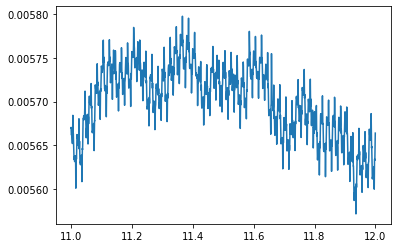

In [7]:
x = eeg_selection[1]
y = eeg_selection[0].T
plt.plot(x, y)

In [8]:
EEG[index].ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'Status']

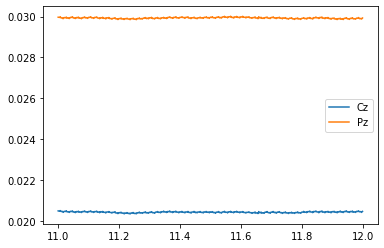

In [9]:
# extract different channels
channel_names = ['Cz', 'Pz']
two_ch = EEG[index][channel_names, start_sample:stop_sample]
# y_offset = np.array([5e-20,0])
x = two_ch[1]
y = two_ch[0].T  # + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)

# Events

One you call numpy np, it should only be called that way in your code. (Correction on line 4)

In [10]:
events = []
events_12 = []
for i in range(len(EEG)):
    events.append(np.loadtxt("./Event Markers\\" +
                  EEG_filenames[i] + ".txt", dtype=int))
print(len(events), "Event Marker files loaded")

eventinfo = True
participantIndex = 5
eventIndex = 500
if(SHOW_EVENT_INFO):
    event_time = Events[participantIndex][eventIndex][0]
    event_ID = Events[participantIndex][eventIndex][2]
    print("\nParticipant", participantIndex, "heard event ID:", event_ID,
          "after", event_time/EEG[participantIndex].info['sfreq'], 'seconds',
          'as the ' + str(eventIndex) + "'th event")
    print("\nEvent ID:", event_ID, "\nCondition:", CODES_overview["condition"][event_ID], "\nStimulus Type:",
          CODES_overview["stimulusType"][event_ID], "\nToken nr:", CODES_overview["nrOfToken"][event_ID], "\n")

OSError: ./Event Markers\101a.txt not found.

We need to check and make explicit where the directory on the event markers is 